In [95]:
import geopandas as gpd 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
%matplotlib inline

In [47]:
#Read shapefiles
world_data = gpd.read_file(r's3://ecb-hackathon-data-group08-x19s00/economic_data/regional_boundaries/NUTS_RG_20M_2021_3035.shp') 

In [96]:
nuts3map = world_data[world_data.LEVL_CODE==3]
world_data.head()

#Load benchmark data
df = pd.read_csv("Benchmark_df.csv")
# select a sector 
sector = 'A'
df= df.loc[df['sector'] == sector]
# df = df.dropna()
df = df.rename(columns={'gross value added': 'GVA'})

minmaxscaler = MinMaxScaler()
stdscaler = StandardScaler()
normalizer = Normalizer()

In [76]:
df.columns

Index(['year', 'NUTS_ID', 'sector', 'area', 'employment', 'gdp', 'GVA',
       'population', 'Total_GVA', 'GVA_share', 'GVAperPOP', 'GVAgrowth',
       'GVAgrowth_LTA', 'GVAgrowth_Anomaly', 'LF_average_a', 'LF_std_a',
       'LF_count_a', 'LF_max_a', 'LF_min_a', 'LF_LTA_mean', 'LF_LTA_std',
       'LF_LTA_min', 'LF_LTA_max', 'LF_Average_Deviation_LTA',
       'maxTemp_MEDIAN', 'median_intensity', 'MEDIAN_spa01', 'MEDIAN_spa03',
       'MEDIAN_spa06', 'MEDIAN_spa12', 'NUTS_CODE', 'SMA_MEDIAN_mean',
       'SMA_MEDIAN_std', 'SMA_MEDIAN_count', 'SMA_MEDIAN_max',
       'SMA_MEDIAN_min', 'SMA_MEDIAN_LTA_mean', 'SMA_MEDIAN_LTA_std',
       'SMA_MEDIAN_LTA_min', 'SMA_MEDIAN_LTA_max',
       'SMA_MEDIAN_Average_Deviation_LTA', 'Heat_MildDrought_Short_Sum',
       'Heat_ModerateDrought_Short_Sum', 'Heat_SevereDrought_Short_Sum',
       'Heat_ExtremeDrought_Short_Sum', 'Heat_MildDrought_Long_Sum',
       'Heat_ModerateDrought_Long_Sum', 'Heat_SevereDrought_Long_Sum',
       'Heat_ExtremeDrought

In [102]:
def plotDfAsMapWithColor(df, columnForColor, title_):
    #plot the map but also color code according to a chosen column (column name) from the (geo)dataframe
    #df[columnForColor] = minmaxscaler.fit_transform(df[columnForColor].values.reshape(-1, 1))
    #ax = df.plot(cmap = 'Greens', column = columnForColor, figsize = (10, 10),legend=True)
    df[columnForColor] = df[columnForColor].values*100
    ax = df.plot(cmap = 'Greens', column = columnForColor, figsize = (10, 10))
    minx, miny, maxx, maxy = 20e5, 10e5, 80e5, 60e5
    plt.title(title_)
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    ax.margins(0)
    plt.show()
    #cbar = plt.colorbar(ticks=[df['GVA'].min(), df['GVA'].max()])
    #cbar.ax.set_yticklabels(['Low GVA', 'High GVA'])

In [82]:
def plotAnyBenchmarkVariableMeanOnMap(chosenVariableName, sector_, title_):
    #e.g. 'GVA', 'A' for GVA agriculture
    df = pd.read_csv("Benchmark_df.csv")
    # select a sector 
    sector = sector_
    df= df.loc[df['sector'] == sector]
    # df = df.dropna()
    df = df.rename(columns={'gross value added': 'GVA'})
    df_ = df[['year','CNTR_CODE','NUTS_ID',chosenVariableName,'sector']]
    mean_per_NUTS = df_[['NUTS_ID',chosenVariableName]].groupby(['NUTS_ID']).mean()
    mean_per_NUTS = mean_per_NUTS.reset_index()
    mean_map = pd.merge(nuts3map,mean_per_NUTS)
    plotDfAsMapWithColor(mean_map, chosenVariableName, title_)


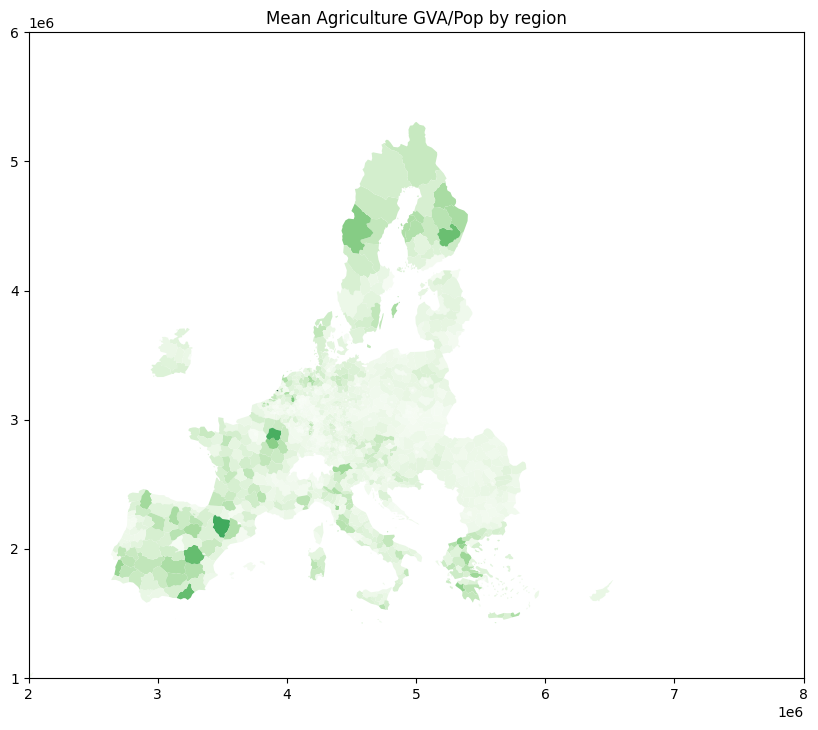

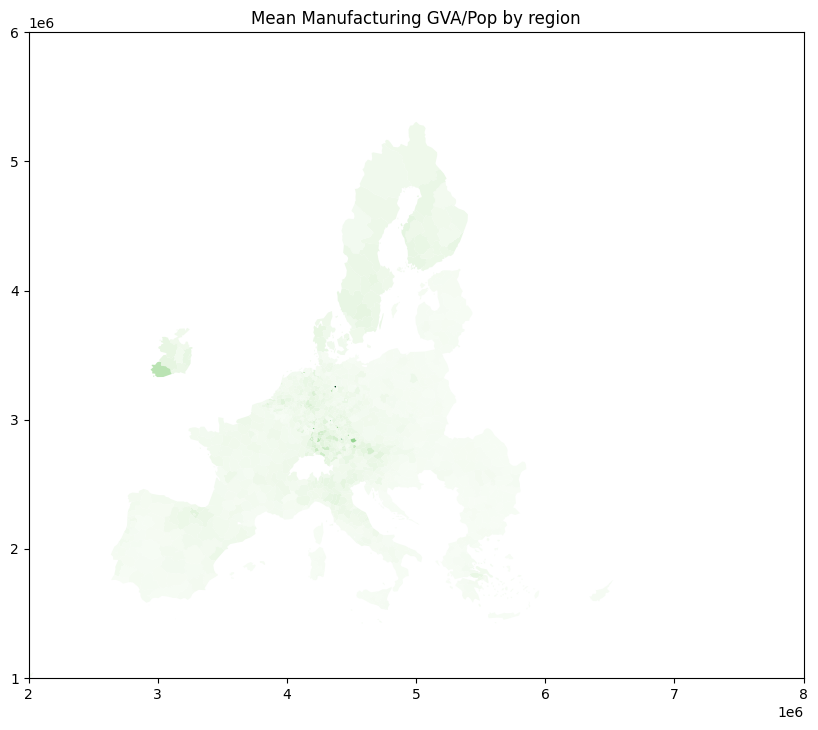

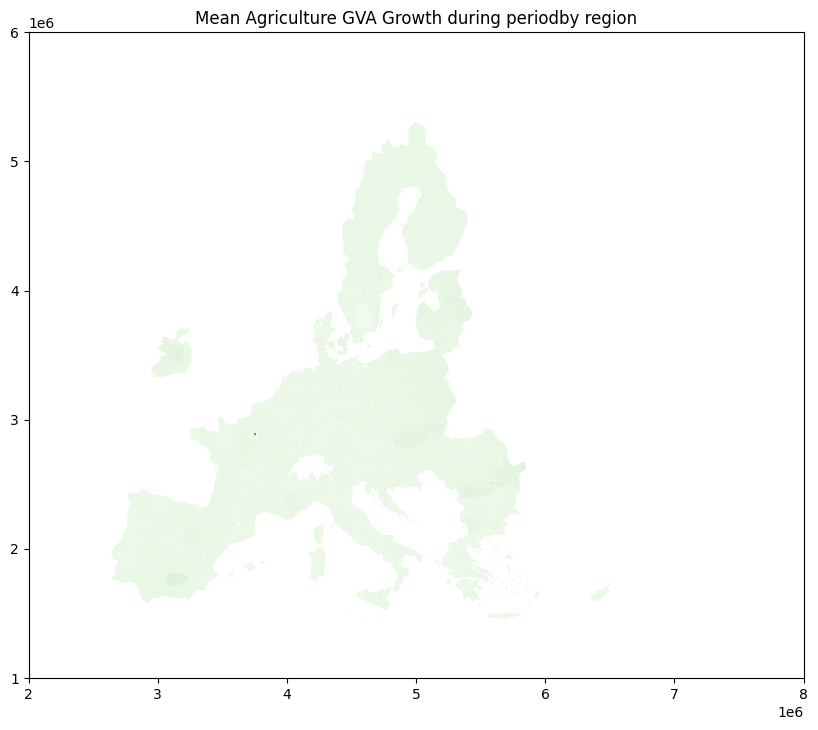

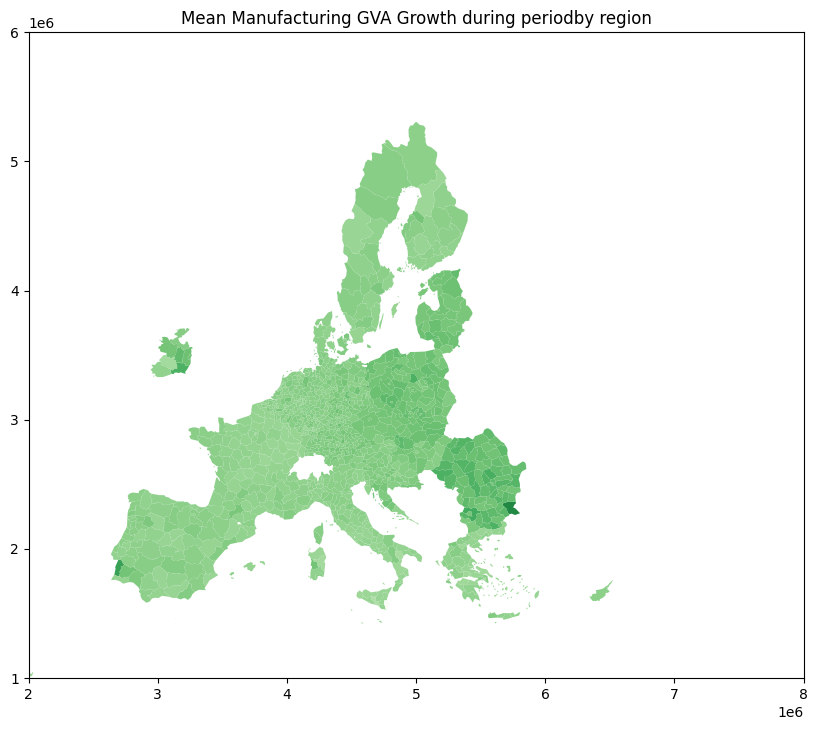

In [103]:
plotAnyBenchmarkVariableMeanOnMap('GVAperPOP', 'A', 'Mean Agriculture GVA/Pop by region')
plotAnyBenchmarkVariableMeanOnMap('GVAperPOP', 'C', 'Mean Manufacturing GVA/Pop by region')

plotAnyBenchmarkVariableMeanOnMap('GVAgrowth', 'A', 'Mean Agriculture GVA Growth during periodby region')
plotAnyBenchmarkVariableMeanOnMap('GVAgrowth', 'C', 'Mean Manufacturing GVA Growth during periodby region')
